<a href="https://colab.research.google.com/github/pseudo-xy/pseudo-xy/blob/main/2.regression_model_on_gold_evolution_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
upload = files.upload()

Saving Nick.csv to Nick.csv


In [3]:
data = pd.read_csv('Nick.csv')
data.head()

,Diesel_cost,NG_cost,Total_cost,Treated_tonnes,treated_tonnes_per_cost
0,5.283093,0.0,5.283093,6.027127,0.744293
1,5.293589,0.0,5.293589,6.069265,0.775974
2,5.249904,0.0,5.249904,6.047789,0.797960
3,5.336473,0.0,5.336473,6.064120,0.727541
4,5.323641,0.0,5.323641,6.076745,0.752816


In [4]:
data.shape

(42, 5)

In [5]:
print(data.dtypes)

Diesel_cost                float64
NG_cost                    float64
Total_cost                 float64
Treated_tonnes             float64
treated_tonnes_per_cost    float64
dtype: object


In [6]:
label = data['treated_tonnes_per_cost']

In [8]:
numeric_features = ['Diesel_cost', 'NG_cost', 'Total_cost', 'Treated_tonnes']
data[numeric_features + ['treated_tonnes_per_cost']].describe()

,Diesel_cost,NG_cost,Total_cost,Treated_tonnes,treated_tonnes_per_cost
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,5.105002,2.098250,5.238115,6.062178,0.824032
std,0.266922,2.355876,0.106130,0.019226,0.110354
min,4.547635,0.000000,5.053301,5.989857,0.521138
25%,4.908822,0.000000,5.151419,6.053778,0.745654
50%,5.162021,0.000000,5.222018,6.065376,0.827658
75%,5.323133,4.836722,5.323133,6.072585,0.911530
max,5.534220,5.065954,5.534220,6.093661,1.014100


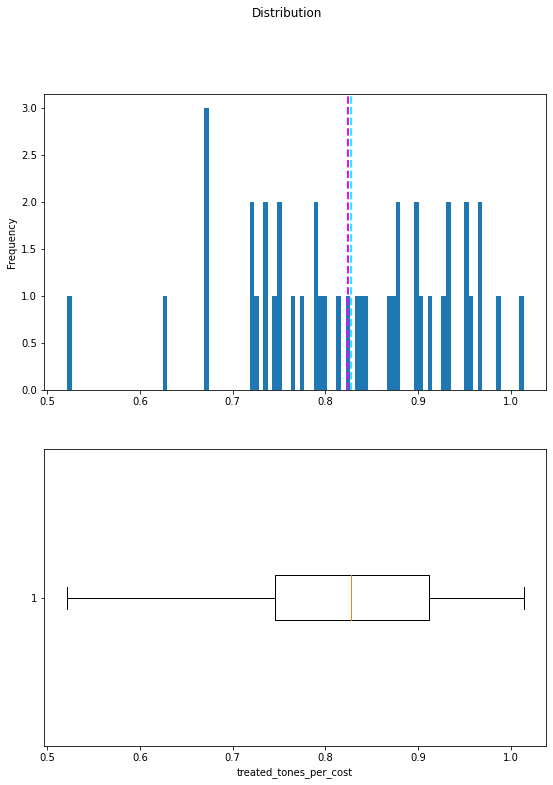

In [9]:
import matplotlib.pyplot as plt
# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('treated_tones_per_cost')

# Add a title to the Figure
fig.suptitle('Distribution')

# Show the figure
fig.show()

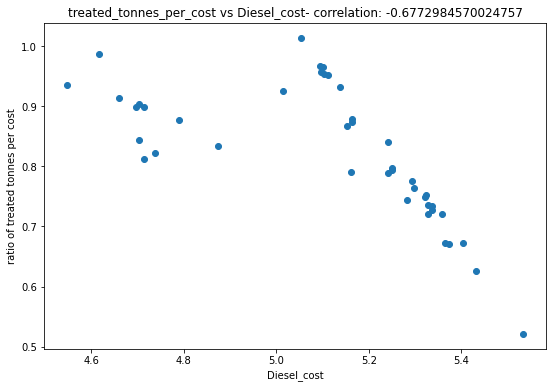

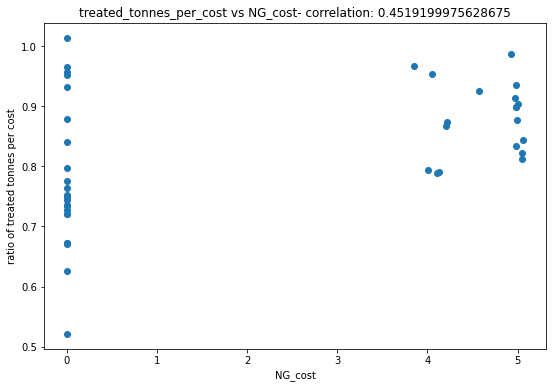

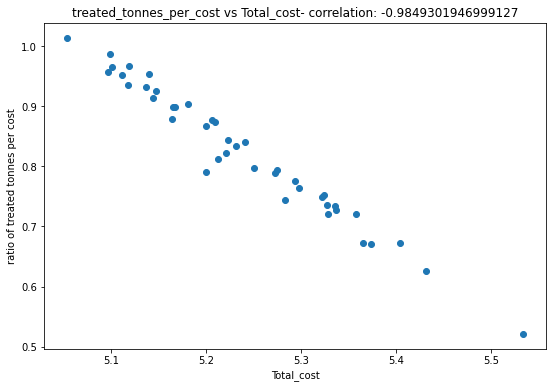

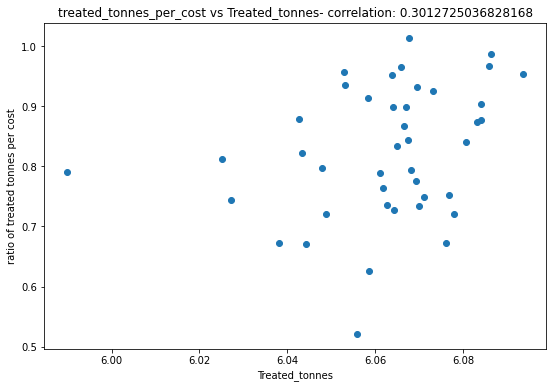

In [10]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['treated_tonnes_per_cost']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('ratio of treated tonnes per cost')
    ax.set_title('treated_tonnes_per_cost vs ' + col + '- correlation: ' + str(correlation))
plt.show()

In [13]:
# Separate features and labels
X, y = data[['Diesel_cost', 'NG_cost', 'Total_cost', 'Treated_tonnes']].values, data['treated_tonnes_per_cost'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[5.28309308 0.         5.28309308 6.02712654]
 [5.29358881 0.         5.29358881 6.06926458]
 [5.24990364 0.         5.24990364 6.04778888]
 [5.33647262 0.         5.33647262 6.06411981]
 [5.32364139 0.         5.32364139 6.07674453]
 [5.32822625 0.         5.32822625 6.04866692]
 [5.33619848 0.         5.33619848 6.06991033]
 [5.3581051  0.         5.3581051  6.07792993]
 [5.29763101 0.         5.29763101 6.0617226 ]
 [5.37380088 0.         5.37380088 6.0442562 ]]

Labels:
[0.74429298 0.77597433 0.79795964 0.72754126 0.75281643 0.7201593
 0.73399929 0.7201593  0.76417613 0.67024585]


In [14]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 29 rows
Test Set: 13 rows


In [15]:
# Train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# Fit a linear regression model on the training set
model_fit = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [16]:
# evaluating the model

import numpy as np

predictions = model_fit.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Actual labels   :  [0.92582758 0.8122447  0.8733206  0.75281643 0.7355989  0.95424251
 0.79379038 0.84010609 0.98721923 0.89927319]


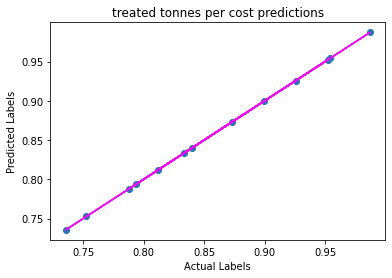

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('treated tonnes per cost predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 2.1801777994632105e-08
RMSE: 0.0001476542515291453
R2: 0.9999964334330121


In [25]:
# saving the model

import joblib

# Save the model as a pickle file
filename = './treated-tonness-per-cost.pkl'
joblib.dump(model_fit, filename)

['./treated-tonness-per-cost.pkl']

In [26]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[4.2,0,4.2,5.33]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} treated tonnes per cost'.format(np.round(result[0])))

New sample: [4.2, 0.0, 4.2, 5.33]
Prediction: 1 treated tonnes per cost
